In [4]:
import pandas as pd
import numpy as np
from itertools import chain
from ast import literal_eval
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from numpy import linalg

# Establishing family cluster centers from train embeddings

In [19]:
embeddings_train = pd.read_csv('embeddings_train.csv')
embeddings_train

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,FID
0,0.000000,1.148604,0.077601,0.000000,0.330892,0.724507,0.706359,2.621339,0.711574,0.559597,...,0.677935,0.275257,0.403777,0.053267,0.440190,1.276735,3.410171,0.874118,2.431400,1
1,0.026505,2.843653,0.036667,0.140773,0.439820,0.162237,0.402628,1.248947,0.176081,1.293322,...,2.736350,0.585024,0.276677,0.046439,0.240849,0.024097,1.918677,0.339023,0.860828,1
2,0.396385,0.017227,1.449943,0.457005,0.660090,3.104025,0.162535,0.317282,3.044244,0.274735,...,0.000000,0.724570,0.303365,0.987310,0.425049,0.323273,0.061678,0.015286,0.000000,1
3,0.070088,0.107260,0.000000,0.623367,1.151152,0.101372,0.376320,4.063272,0.005148,0.000000,...,0.704494,0.456813,0.228787,0.036231,0.267743,0.330908,0.064385,0.117440,1.476113,1
4,0.003043,3.341924,0.072611,0.882866,2.593809,0.463429,0.200160,2.014732,0.451550,3.344895,...,2.083046,0.187007,0.325634,0.098181,0.310169,1.337286,2.631824,0.405561,2.016721,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14618,0.961123,0.445035,0.091696,0.107786,0.138306,0.000000,0.017891,0.000000,0.021470,1.148420,...,0.124575,0.324717,2.274363,0.056280,0.024238,0.271212,0.000000,0.496473,0.160000,1018
14619,0.000000,2.224211,0.034146,1.360519,0.648028,0.000000,0.671759,0.145744,0.171093,1.140808,...,1.498913,0.021208,0.491970,0.045728,0.000000,0.150574,0.000000,0.048687,0.213497,1018
14620,0.000000,1.401733,0.180991,0.339662,3.079481,1.192621,0.000360,2.155383,0.568639,0.229383,...,0.618747,0.087340,0.262079,1.356303,0.093610,0.101131,0.231618,0.520442,0.516739,1018
14621,0.479471,0.514870,0.042741,0.479216,0.383514,0.087168,0.936547,0.000000,2.255057,2.820555,...,0.059183,0.533107,1.810041,0.105125,1.143974,0.252220,0.287642,0.168336,0.116358,1018


In [20]:
family_cluster_center = embeddings_train.groupby(['FID']).mean()
family_cluster_center.to_csv('family_cluster_center.csv')

In [21]:
embeddings_test = pd.read_csv('embeddings_test.csv')
embeddings_test

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,FID
0,1.576262,1.293678,0.725400,0.821580,0.883208,0.644752,0.751253,0.805797,0.417673,0.733668,...,0.421147,0.540527,0.511009,0.718153,0.790381,0.935596,0.417599,0.832597,0.941422,1
1,1.471753,1.245041,1.013307,0.575682,0.926886,1.234405,1.105336,1.002703,0.620929,1.164725,...,0.830172,0.569776,0.510761,1.081957,1.237316,0.821088,0.987143,1.209395,0.460086,1
2,0.675976,0.608810,0.668918,0.965133,0.582952,0.251235,0.387756,0.786325,0.858812,0.594845,...,0.793035,0.863034,0.377252,1.045346,0.767574,0.594254,0.676308,0.199805,1.119643,1
3,0.903896,0.959041,1.099488,0.628026,1.113022,0.995377,1.078357,0.643790,0.976987,0.902538,...,0.411756,0.978151,0.763276,1.080857,0.482161,0.957081,0.633099,0.488313,0.779372,1
4,0.716419,0.801318,0.860410,0.637701,0.813905,1.001483,1.239606,1.169067,0.957475,1.101357,...,1.206552,1.304872,0.882696,0.862655,1.662880,0.452117,1.325470,1.153928,0.872882,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,0.511309,0.447364,1.139724,0.630561,0.808129,0.668132,0.720399,0.878030,0.608890,0.424764,...,0.326724,0.603546,0.951430,1.002511,0.756060,0.704347,0.881302,0.611346,0.414894,1018
6263,0.885862,1.036438,1.229681,0.909607,1.254445,1.057761,1.687416,0.664051,1.239003,1.695080,...,0.662861,1.086217,0.740290,1.281191,0.979029,0.750924,1.276728,0.872667,1.089399,1018
6264,0.778617,0.463813,0.488164,0.858242,0.873706,0.465652,0.541154,0.963363,0.862125,0.873731,...,0.500273,0.676636,0.550872,0.731223,0.490111,0.592714,0.817863,0.689352,1.010181,1018
6265,0.834894,0.617839,0.743107,0.616387,0.654972,0.439828,0.603522,0.707330,0.736051,0.406937,...,0.384026,0.701998,0.802554,0.799696,1.093295,0.817912,0.412996,0.477989,0.735342,1018


In [40]:
distances = linalg.norm(family_cluster_center- embeddings_train.iloc[0,:-1], axis=0)

In [41]:
family_id = family_cluster_center.index.values
len(family_id)

763

In [42]:
correct, incorrect = 0,0;

for i in range(len(embeddings_train)):
    distances = linalg.norm(family_cluster_center- embeddings_train.iloc[i,:-1], axis=0)
    if(family_id[np.argmin(distances)] == embeddings_train.iloc[i,-1]):
        correct+=1
    else:
        incorrect+=1
    
    

In [43]:
print(correct, incorrect, len(embeddings_train))

15 14608 14623


In [27]:
family_id[483]

664

In [30]:
embeddings_test.iloc[0,-1]

1

In [69]:
tsne = TSNE()
components = tsne.fit_transform(family_cluster_center)

/home/mishra.g/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/mishra.g/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


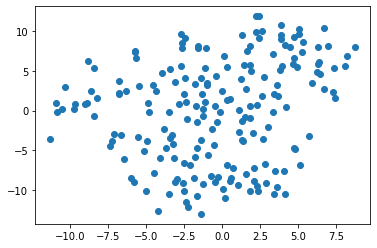

In [70]:
plt.scatter(components[:,0],components[:,1])#,family_cluster_center.index.values)

In [63]:
family_cluster_center.index.values

array([   1,    2,    4,    5,    9,   10,   11,   12,   13,   15,   16,
         18,   20,   21,   23,   24,   29,   31,   32,   33,   35,   36,
         38,   39,   42,   43,   45,   46,   47,   48,   50,   51,   52,
         54,   58,   59,   61,   62,   64,   66,   67,   68,   69,   70,
         73,   76,   77,   79,   80,   81,   84,   86,   88,   89,   90,
         95,   96,   97,   98,  101,  102,  104,  105,  107,  110,  111,
        113,  115,  116,  117,  118,  120,  124,  125,  127,  128,  130,
        131,  132,  135,  136,  138,  141,  142,  143,  144,  145,  149,
        150,  152,  153,  154,  156,  157,  163,  166,  168,  171,  173,
        174,  178,  179,  180,  181,  184,  186,  187,  188,  190,  191,
        192,  194,  195,  196,  197,  198,  202,  206,  207,  208,  209,
        210,  212,  213,  214,  215,  216,  221,  225,  227,  228,  229,
        232,  234,  235,  237,  239,  241,  242,  246,  247,  249,  251,
        252,  253,  254,  256,  257,  260,  262,  2

In [65]:
len(components)

571

In [1]:
FIDs = [   1,    2,    4,    5,    9,   10,   11,   12,   13,   15,   16,
         18,   20,   21,   23,   24,   29,   31,   32,   33,   35,   36,
         38,   39,   42,   43,   45,   46,   47,   48,   50,   51,   52,
         54,   58,   59,   61,   62,   64,   66,   67,   68,   69,   70,
         73,   76,   77,   79,   80,   81,   84,   86,   88,   89,   90,
         95,   96,   97,   98,  101,  102,  104,  105,  107,  110,  111,
        113,  115,  116,  117,  118,  120,  124,  125,  127,  128,  130,
        131,  132,  135,  136,  138,  141,  142,  143,  144,  145,  149,
        150,  152,  153,  154,  156,  157,  163,  166,  168,  171,  173,
        174,  178,  179,  180,  181,  184,  186,  187,  188,  190,  191,
        192,  194,  195,  196,  197,  198,  202,  206,  207,  208,  209,
        210,  212,  213,  214,  215,  216,  221,  225,  227,  228,  229,
        232,  234,  235,  237,  239,  241,  242,  246,  247,  249,  251,
        252,  253,  254,  256,  257,  260,  262,  263,  264,  267,  268,
        269,  270,  271,  272,  273,  274,  277,  279,  280,  284,  286,
        288,  289,  291,  293,  294,  295,  296,  297,  298,  299,  300,
        301,  302,  303,  305,  307,  308,  314,  315,  319,  321,  322,
        325,  326,  327,  337,  338,  339,  340,  348,  350,  353,  354,
        355,  357,  361,  362,  364,  365,  368,  372,  373,  375,  376,
        377,  378,  379,  380,  382,  387,  388,  389,  391,  392,  393,
        394,  395,  401,  402,  403,  410,  411,  412,  413,  415,  416,
        418,  419,  423,  424,  425,  426,  428,  432,  434,  437,  439,
        442,  444,  445,  447,  449,  451,  453,  454,  456,  459,  460,
        464,  465,  466,  467,  469,  471,  473,  475,  476,  477,  478,
        482,  486,  489,  494,  496,  497,  501,  503,  504,  506,  508,
        509,  514,  515,  517,  518,  521,  523,  525,  526,  527,  528,
        529,  532,  535,  537,  539,  540,  541,  542,  544,  545,  548,
        549,  550,  551,  552,  556,  559,  560,  561,  565,  566,  569,
        571,  574,  576,  578,  579,  580,  582,  583,  585,  588,  589,
        590,  591,  592,  595,  596,  598,  600,  601,  602,  604,  605,
        607,  610,  611,  612,  613,  615,  618,  622,  623,  624,  625,
        629,  631,  635,  636,  637,  639,  641,  642,  645,  646,  647,
        650,  651,  653,  658,  659,  661,  662,  664,  670,  672,  673,
        677,  678,  680,  682,  683,  684,  685,  686,  687,  688,  690,
        691,  692,  694,  695,  696,  701,  702,  703,  704,  708,  711,
        714,  715,  716,  717,  718,  720,  722,  723,  726,  727,  729,
        730,  733,  734,  737,  738,  739,  740,  741,  742,  743,  744,
        745,  746,  747,  748,  749,  751,  757,  759,  760,  761,  763,
        764,  765,  767,  770,  771,  773,  774,  776,  778,  779,  780,
        781,  782,  783,  788,  789,  790,  793,  795,  796,  798,  801,
        802,  804,  806,  808,  810,  811,  812,  814,  816,  817,  818,
        821,  822,  825,  827,  829,  834,  835,  838,  840,  842,  843,
        844,  845,  847,  848,  849,  850,  851,  852,  856,  857,  860,
        861,  863,  865,  867,  868,  869,  874,  875,  878,  880,  881,
        882,  883,  884,  885,  886,  887,  888,  889,  890,  891,  892,
        894,  895,  896,  897,  898,  899,  901,  904,  906,  909,  911,
        915,  918,  920,  922,  926,  928,  929,  932,  933,  934,  935,
        936,  937,  940,  941,  942,  944,  945,  946,  947,  948,  949,
        951,  954,  955,  956,  957,  959,  960,  961,  963,  964,  965,
        966,  967,  968,  969,  971,  972,  973,  974,  975,  976,  978,
        979,  980,  984,  985,  987,  989,  991,  992,  993,  994,  997,
        998, 1001, 1002, 1003, 1005, 1007, 1013, 1016, 1017, 1018]

In [33]:
FID_dict = {}
for index, i in enumerate(train_list):
    FID_dict[i] = index
    

In [34]:
FID_dict

{1: 0,
 2: 1,
 4: 2,
 5: 3,
 7: 4,
 9: 5,
 10: 6,
 11: 7,
 12: 8,
 13: 9,
 15: 10,
 16: 11,
 18: 12,
 20: 13,
 21: 14,
 22: 15,
 23: 16,
 24: 17,
 29: 18,
 31: 19,
 32: 20,
 33: 21,
 35: 22,
 36: 23,
 38: 24,
 39: 25,
 40: 26,
 42: 27,
 43: 28,
 44: 29,
 45: 30,
 46: 31,
 47: 32,
 48: 33,
 50: 34,
 51: 35,
 52: 36,
 53: 37,
 54: 38,
 58: 39,
 59: 40,
 61: 41,
 62: 42,
 63: 43,
 64: 44,
 65: 45,
 66: 46,
 67: 47,
 68: 48,
 69: 49,
 70: 50,
 71: 51,
 73: 52,
 74: 53,
 76: 54,
 77: 55,
 79: 56,
 80: 57,
 81: 58,
 84: 59,
 86: 60,
 87: 61,
 88: 62,
 89: 63,
 90: 64,
 91: 65,
 95: 66,
 96: 67,
 97: 68,
 98: 69,
 101: 70,
 102: 71,
 104: 72,
 105: 73,
 107: 74,
 109: 75,
 110: 76,
 111: 77,
 112: 78,
 113: 79,
 114: 80,
 115: 81,
 116: 82,
 117: 83,
 118: 84,
 119: 85,
 120: 86,
 123: 87,
 124: 88,
 125: 89,
 126: 90,
 127: 91,
 128: 92,
 130: 93,
 131: 94,
 132: 95,
 133: 96,
 135: 97,
 136: 98,
 138: 99,
 139: 100,
 141: 101,
 142: 102,
 143: 103,
 144: 104,
 145: 105,
 147: 106,
 148: 107

In [30]:
train_list = pd.read_csv('../../data/T-1/all_images/train_list.csv')

In [31]:
train_list = train_list.iloc[:,1].sort_values().unique()

In [32]:
train_list

array([   1,    2,    4,    5,    7,    9,   10,   11,   12,   13,   15,
         16,   18,   20,   21,   22,   23,   24,   29,   31,   32,   33,
         35,   36,   38,   39,   40,   42,   43,   44,   45,   46,   47,
         48,   50,   51,   52,   53,   54,   58,   59,   61,   62,   63,
         64,   65,   66,   67,   68,   69,   70,   71,   73,   74,   76,
         77,   79,   80,   81,   84,   86,   87,   88,   89,   90,   91,
         95,   96,   97,   98,  101,  102,  104,  105,  107,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  123,
        124,  125,  126,  127,  128,  130,  131,  132,  133,  135,  136,
        138,  139,  141,  142,  143,  144,  145,  147,  148,  149,  150,
        152,  153,  154,  156,  157,  159,  162,  163,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  174,  176,  178,  179,  180,
        181,  182,  183,  184,  186,  187,  188,  190,  191,  192,  194,
        195,  196,  197,  198,  199,  200,  202,  2